Loaded 8 data points from right-ear.csv
Data points:
  1: (0.2, 26.0)
  2: (0.5, 24.0)
  3: (1.0, 29.0)
  4: (2.0, 48.0)
  5: (3.0, 53.0)
  6: (4.0, 54.0)
  7: (6.0, 63.0)
  8: (8.0, 77.0)

Trying multiple curve fitting methods...
=== STARTING CURVE FITTING ===
Data range: X = 0.2 to 8.0
Data range: Y = 24.0 to 77.0
Will plot 8 data points
X data: [0.25 0.5  1.   2.   3.   4.   6.   8.  ]
Y data: [26. 24. 29. 48. 53. 54. 63. 77.]
Point 1: x=0.2, y=26.0
Point 2: x=0.5, y=24.0
Point 3: x=1.0, y=29.0
Point 4: x=2.0, y=48.0
Point 5: x=3.0, y=53.0
Point 6: x=4.0, y=54.0
Point 7: x=6.0, y=63.0
Point 8: x=8.0, y=77.0

=== TRYING FITTING METHODS ===
Trying UnivariateSpline...
UnivariateSpline created successfully
x_smooth range: 0.250 to 8.000
y_spline range: 22.403 to 77.082
y_spline has 1000 points
y_pred: [26.4063517  22.61652341 30.75195314 47.15039214 52.24402343 55.17152987
 62.57729365 77.08193266]
UnivariateSpline: R² = 0.9968 - SUCCESS

Trying CubicSpline...
CubicSpline created succes

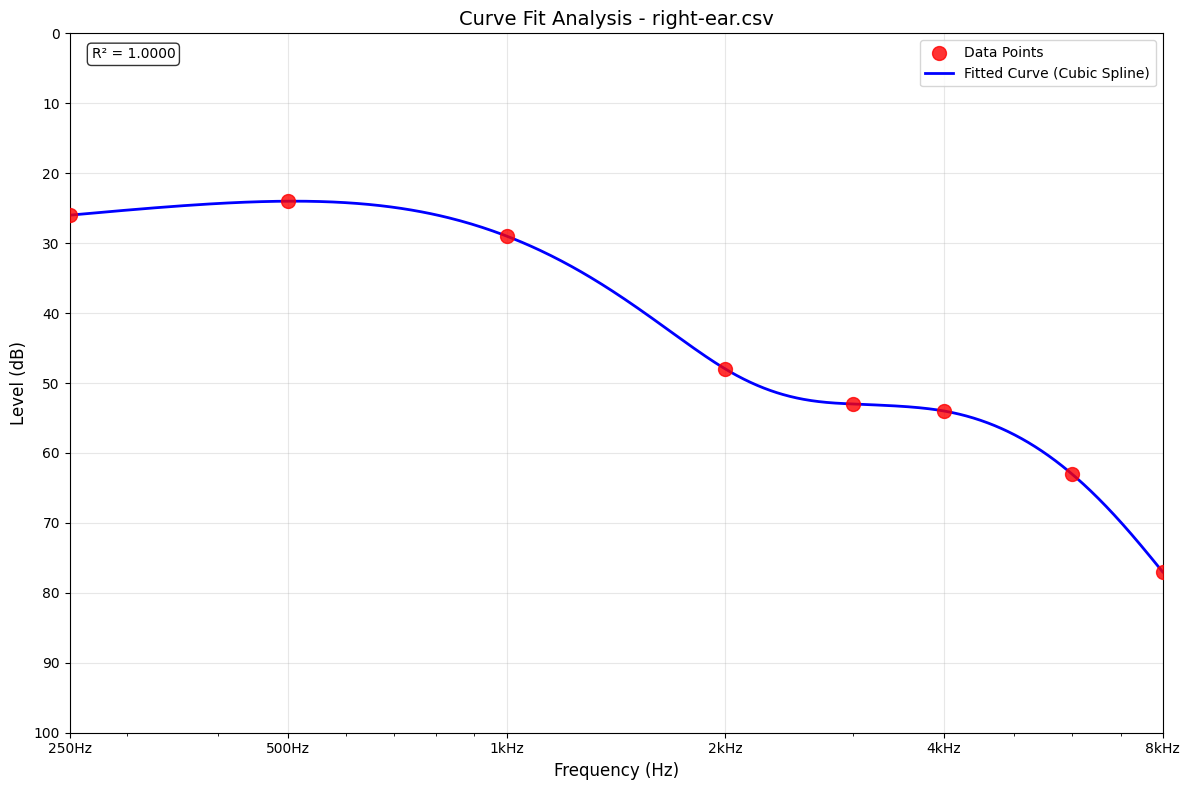

plt.show() completed successfully!
Saving plot to file...
Plot saved as 'curve_fit_plot.png' successfully!
Final summary:
  - Data points: 8
  - Curve points: 1000
  - Best method: Cubic Spline
  - R²: 1.0000
=== END OF PLOTTING FUNCTION ===

=== CREATING FREQUENCY TABLE ===
Found Cubic Spline method with R² = 1.0000
Creating 20 points from 0.25 to 8.00
Table frequencies: [0.25       0.61904762 0.98809524 1.35714286 1.72619048 2.0952381
 2.46428571 2.83333333 3.20238095 3.57142857 3.94047619 4.30952381
 4.67857143 5.04761905 5.41666667 5.78571429 6.1547619  6.52380952
 6.89285714 7.26190476 7.63095238 8.        ]
Table values: [26.         24.30697856 28.7940119  36.00263171 43.50665621 49.17386349
 51.95676404 52.86848549 53.1234607  53.39673711 53.88798065 54.75781919
 56.01808758 57.62084388 59.51798426 61.6614049  64.00300197 66.49467166
 69.08831013 71.73581356 74.38907812 77.        ]

=== FREQUENCY-VALUE TABLE ===
Frequency (kHz) | Value (dB)
------------------------------
     

<Figure size 640x480 with 0 Axes>

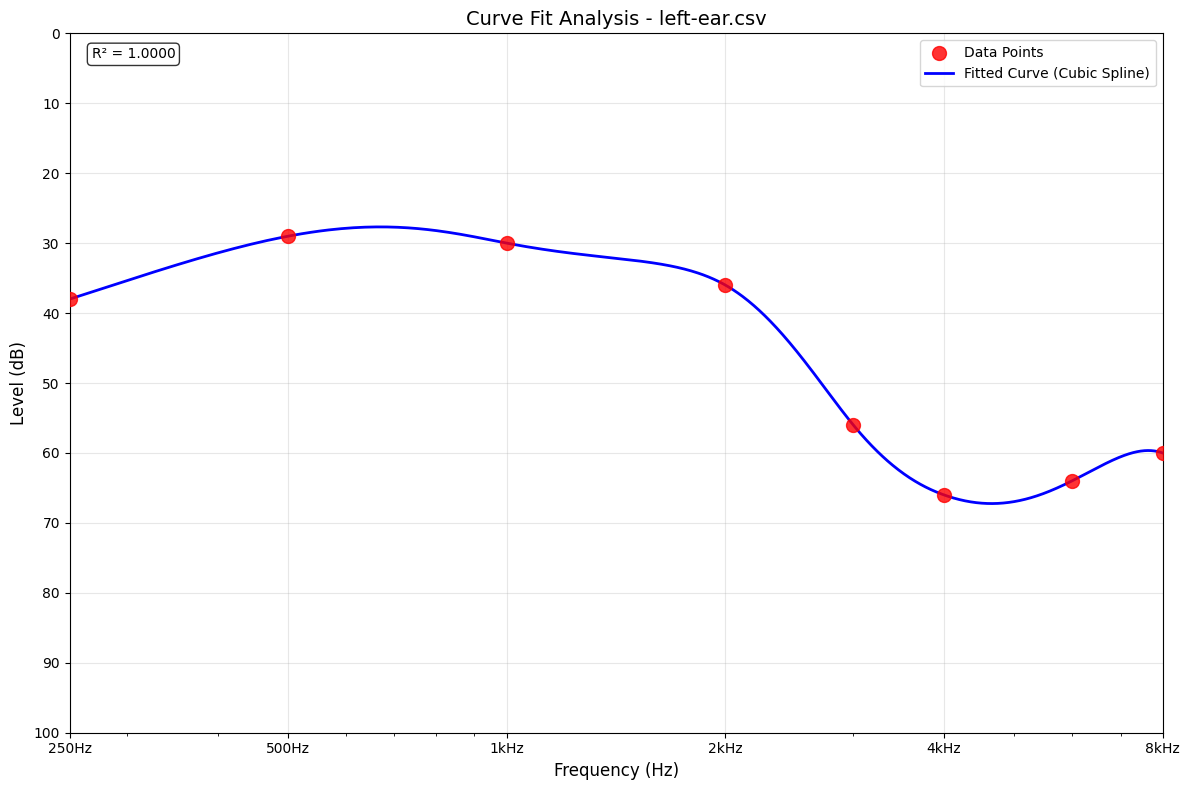

plt.show() completed successfully!
Saving plot to file...
Plot saved as 'curve_fit_plot.png' successfully!
Final summary:
  - Data points: 8
  - Curve points: 1000
  - Best method: Cubic Spline
  - R²: 1.0000
=== END OF PLOTTING FUNCTION ===

=== CREATING FREQUENCY TABLE ===
Found Cubic Spline method with R² = 1.0000
Creating 20 points from 0.25 to 8.00
Table frequencies: [0.25       0.61904762 0.98809524 1.35714286 1.72619048 2.0952381
 2.46428571 2.83333333 3.20238095 3.57142857 3.94047619 4.30952381
 4.67857143 5.04761905 5.41666667 5.78571429 6.1547619  6.52380952
 6.89285714 7.26190476 7.63095238 8.        ]
Table values: [38.         27.77812544 29.89647987 31.9644495  33.51676928 37.35630004
 44.52115812 52.69683731 59.28709112 63.42070331 65.74679466 66.91437694
 67.23151035 66.86927976 65.99839909 64.78958223 63.41354309 62.04099558
 60.84265361 59.98923109 59.65144191 60.        ]

=== FREQUENCY-VALUE TABLE ===
Frequency (kHz) | Value (dB)
------------------------------
     

<Figure size 640x480 with 0 Axes>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline, interp1d, CubicSpline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import sys
import csv

def read_data(filename):
    """Read data points from CSV file"""
    x_data = []
    y_data = []
    
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            if len(row) >= 2:
                try:
                    x_data.append(float(row[0]))
                    y_data.append(float(row[1]))
                except ValueError:
                    continue  # Skip non-numeric rows
    
    return np.array(x_data), np.array(y_data)

def polynomial_func(x, a, b, c, d, e):
    """4th degree polynomial function for curve fitting"""
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

def exponential_decay(x, a, b, c, d):
    """Exponential decay function - good for hearing loss curves"""
    return a * np.exp(-b * x) + c * x + d

def logarithmic_func(x, a, b, c):
    """Logarithmic function"""
    return a * np.log(x + 1) + b * x + c

def fit_and_plot(x_data, y_data, filename):
    """Try multiple curve fitting methods and create plot"""
    
    print("=== STARTING CURVE FITTING ===")
    print(f"Data range: X = {x_data.min():.1f} to {x_data.max():.1f}")
    print(f"Data range: Y = {y_data.min():.1f} to {y_data.max():.1f}")
    print(f"Will plot {len(x_data)} data points")
    print(f"X data: {x_data}")
    print(f"Y data: {y_data}")
    
    # Debug: Print each data point
    for i, (x, y) in enumerate(zip(x_data, y_data)):
        print(f"Point {i+1}: x={x:.1f}, y={y:.1f}")
    
    # Try different fitting methods
    methods = []
    print("\n=== TRYING FITTING METHODS ===")
    
    # 1. Scipy UnivariateSpline (smoothing spline)
    print("Trying UnivariateSpline...")
    try:
        spline = UnivariateSpline(x_data, y_data, s=None)  # s=None for interpolation
        print("UnivariateSpline created successfully")
        
        x_smooth = np.linspace(x_data.min(), x_data.max(), 1000)
        print(f"x_smooth range: {x_smooth.min():.3f} to {x_smooth.max():.3f}")
        
        y_spline = spline(x_smooth)
        print(f"y_spline range: {y_spline.min():.3f} to {y_spline.max():.3f}")
        print(f"y_spline has {len(y_spline)} points")
        
        # Calculate R-squared
        y_pred = spline(x_data)
        print(f"y_pred: {y_pred}")
        ss_res = np.sum((y_data - y_pred) ** 2)
        ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)
        r_squared = 1 - (ss_res / ss_tot) if ss_tot != 0 else 1.0
        
        methods.append(("Univariate Spline", r_squared, x_smooth, y_spline))
        print(f"UnivariateSpline: R² = {r_squared:.4f} - SUCCESS")
    except Exception as e:
        print(f"UnivariateSpline failed: {e}")
        import traceback
        traceback.print_exc()
    
    # 2. Cubic Spline
    print("\nTrying CubicSpline...")
    try:
        cs = CubicSpline(x_data, y_data)
        print("CubicSpline created successfully")
        
        x_smooth = np.linspace(x_data.min(), x_data.max(), 1000)
        y_cubic = cs(x_smooth)
        print(f"y_cubic range: {y_cubic.min():.3f} to {y_cubic.max():.3f}")
        
        y_pred = cs(x_data)
        ss_res = np.sum((y_data - y_pred) ** 2)
        ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)
        r_squared = 1 - (ss_res / ss_tot) if ss_tot != 0 else 1.0
        
        methods.append(("Cubic Spline", r_squared, x_smooth, y_cubic))
        print(f"CubicSpline: R² = {r_squared:.4f} - SUCCESS")
    except Exception as e:
        print(f"CubicSpline failed: {e}")
        import traceback
        traceback.print_exc()
    
    # Skip complex methods for now, just use simple polynomial
    print("\nTrying simple scipy polynomial...")
    try:
        popt, _ = curve_fit(polynomial_func, x_data, y_data, maxfev=10000)
        print(f"Polynomial coefficients: {popt}")
        
        x_smooth = np.linspace(x_data.min(), x_data.max(), 1000)
        y_poly_scipy = polynomial_func(x_smooth, *popt)
        print(f"y_poly_scipy range: {y_poly_scipy.min():.3f} to {y_poly_scipy.max():.3f}")
        
        y_pred = polynomial_func(x_data, *popt)
        ss_res = np.sum((y_data - y_pred) ** 2)
        ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)
        r_squared = 1 - (ss_res / ss_tot) if ss_tot != 0 else 1.0
        
        methods.append(("Scipy Polynomial (4th degree)", r_squared, x_smooth, y_poly_scipy))
        print(f"Scipy Polynomial (4th degree): R² = {r_squared:.4f} - SUCCESS")
    except Exception as e:
        print(f"Scipy Polynomial failed: {e}")
        import traceback
        traceback.print_exc()
    
    print(f"\n=== METHODS SUMMARY ===")
    print(f"Total successful methods: {len(methods)}")
    for i, (name, r2, _, _) in enumerate(methods):
        print(f"  {i+1}. {name}: R² = {r2:.4f}")
    
    # Choose the best method
    if not methods:
        print("All fitting methods failed, using linear interpolation")
        x_smooth = np.linspace(x_data.min(), x_data.max(), 1000)
        y_smooth = np.interp(x_smooth, x_data, y_data)
        best_name = "Linear Interpolation"
        best_r_squared = 0.0
    else:
        # Sort by R-squared and pick the best
        methods.sort(key=lambda x: x[1], reverse=True)
        best_name, best_r_squared, x_smooth, y_smooth = methods[0]
        print(f"\nBest method: {best_name} with R² = {best_r_squared:.4f}")
    
    print(f"\n=== PLOTTING PREPARATION ===")
    print(f"x_smooth: {len(x_smooth)} points from {x_smooth.min():.3f} to {x_smooth.max():.3f}")
    print(f"y_smooth: {len(y_smooth)} points from {y_smooth.min():.3f} to {y_smooth.max():.3f}")
    
    # Create the plot
    print("Creating matplotlib figure...")
    plt.figure(figsize=(12, 8))
    print("Figure created")
    
    # Convert data to Hz if it appears to be in kHz (values < 50 suggest kHz)
    if x_data.max() < 50:
        print("Converting frequency data from kHz to Hz")
        x_plot = x_data * 1000  # Convert kHz to Hz
        x_smooth_plot = x_smooth * 1000
        print(f"x_plot range: {x_plot.min():.0f} to {x_plot.max():.0f}")
        print(f"x_smooth_plot range: {x_smooth_plot.min():.0f} to {x_smooth_plot.max():.0f}")
    else:
        x_plot = x_data
        x_smooth_plot = x_smooth
        print("No frequency conversion needed")
    
    # Plot original data points
    print("Plotting scatter points...")
    scatter = plt.scatter(x_plot, y_data, color='red', s=100, zorder=5, label='Data Points', alpha=0.8)
    print(f"Scatter plot created with {len(x_plot)} points")
    
    # Plot fitted curve
    print("Plotting fitted curve...")
    line = plt.plot(x_smooth_plot, y_smooth, 'b-', linewidth=2, label=f'Fitted Curve ({best_name})')
    print(f"Line plot created with {len(x_smooth_plot)} points")
    
    # Set axis properties
    print("Setting axis properties...")
    plt.xlim(250, 8000)
    plt.ylim(0, 100)
    plt.gca().invert_yaxis()  # Invert y-axis so 0 is at top
    print("Axis limits and inversion set")
    
    # Set logarithmic scale for x-axis
    print("Setting log scale...")
    plt.xscale('log')
    print("Log scale set")
    
    # Set tick marks
    print("Setting tick marks...")
    plt.xticks([250, 500, 1000, 2000, 4000, 8000], 
               ['250Hz', '500Hz', '1kHz', '2kHz', '4kHz', '8kHz'])
    plt.yticks(range(0, 101, 10))
    print("Tick marks set")
    
    # Labels and title
    print("Adding labels...")
    plt.xlabel('Frequency (Hz)', fontsize=12)
    plt.ylabel('Level (dB)', fontsize=12)
    plt.title(f'Curve Fit Analysis - {filename}', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    print("Labels and legend added")
    
    # Add R-squared annotation
    if best_r_squared > 0:
        print("Adding R-squared annotation...")
        plt.text(0.02, 0.98, f'R² = {best_r_squared:.4f}', 
                 transform=plt.gca().transAxes, 
                 verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        print("R-squared annotation added")
    
    print("Calling tight_layout...")
    plt.tight_layout()
    print("tight_layout completed")
    
    # Force the plot to show and add debugging
    print("\n=== FINAL PLOTTING ===")
    print(f"About to call plt.show()...")
    
    # Try different ways to show the plot
    try:
        print("Calling plt.show()...")
        plt.show()
        print("plt.show() completed successfully!")
    except Exception as e:
        print(f"plt.show() failed: {e}")
        import traceback
        traceback.print_exc()
    
    # Alternative: save to file as backup
    try:
        print("Saving plot to file...")
        plt.savefig('curve_fit_plot.png', dpi=150, bbox_inches='tight')
        print("Plot saved as 'curve_fit_plot.png' successfully!")
    except Exception as e:
        print(f"plt.savefig() failed: {e}")
        import traceback
        traceback.print_exc()
    
    print(f"Final summary:")
    print(f"  - Data points: {len(x_data)}")
    print(f"  - Curve points: {len(x_smooth) if 'x_smooth' in locals() else 'unknown'}")
    print(f"  - Best method: {best_name}")
    print(f"  - R²: {best_r_squared:.4f}")
    print("=== END OF PLOTTING FUNCTION ===")
    
    # Create table with 20 equal parts starting at 0.25
    print("\n=== CREATING FREQUENCY TABLE ===")
    
    # Find the cubic spline from our methods
    cubic_spline_obj = None
    for name, r2, x_curve, y_curve in methods:
        if "Cubic Spline" in name:
            print(f"Found Cubic Spline method with R² = {r2:.4f}")
            # We need to recreate the CubicSpline object to evaluate at specific points
            cubic_spline_obj = CubicSpline(x_data, y_data)
            break
    
    if cubic_spline_obj is None:
        print("Cubic Spline not found, creating one now...")
        try:
            cubic_spline_obj = CubicSpline(x_data, y_data)
            print("Cubic Spline created successfully")
        except Exception as e:
            print(f"Failed to create Cubic Spline: {e}")
            return best_name, best_r_squared
    
    # Create 20 equally spaced points from 0.25 to max frequency
    x_max = x_data.max()
    print(f"Creating 20 points from 0.25 to {x_max:.2f}")
    
    # Calculate step size for 20 equal parts
    step_size = (x_max - 0.25) / 21  # 19 intervals = 22 points
    table_frequencies = []
    for i in range(22):
        freq = 0.25 + i * step_size
        table_frequencies.append(freq)
    
    table_frequencies = np.array(table_frequencies)
    print(f"Table frequencies: {table_frequencies}")
    
    # Evaluate cubic spline at these frequencies
    try:
        table_values = cubic_spline_obj(table_frequencies)
        print(f"Table values: {table_values}")
        
        # Create and display the table
        print("\n=== FREQUENCY-VALUE TABLE ===")
        print("Frequency (kHz) | Value (dB)")
        print("-" * 30)
        
        for freq, value in zip(table_frequencies, table_values):
            print(f"{freq:11.3f} | {value:8.2f}")
        
        # Also save to CSV file
        table_filename = "frequency_table.csv"
        with open(table_filename, 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(['Frequency_kHz', 'Value_dB'])
            for freq, value in zip(table_frequencies, table_values):
                writer.writerow([f"{freq:.3f}", f"{value:.2f}"])
        
        print(f"\nTable also saved to '{table_filename}'")
        
    except Exception as e:
        print(f"Failed to evaluate cubic spline at table frequencies: {e}")
        import traceback
        traceback.print_exc()
    
    print("=== TABLE CREATION COMPLETE ===")
    
    return best_name, best_r_squared

def main():
    # Use hardcoded filename as in your version
    filename = "right-ear.csv"
    
    try:
        x_data, y_data = read_data(filename)
        
        if len(x_data) < 2:
            print("Error: Need at least 2 data points for plotting")
            sys.exit(1)
        
        print(f"Loaded {len(x_data)} data points from {filename}")
        print("Data points:")
        for i, (x, y) in enumerate(zip(x_data, y_data)):
            print(f"  {i+1}: ({x:.1f}, {y:.1f})")
        
        print("\nTrying multiple curve fitting methods...")
        fit_and_plot(x_data, y_data, filename)
        
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found")
        sys.exit(1)
    except Exception as e:
        print(f"Error processing file: {e}")
        sys.exit(1)

def main1():
    # Use hardcoded filename as in your version
    filename = "left-ear.csv"
    
    try:
        x_data, y_data = read_data(filename)
        
        if len(x_data) < 2:
            print("Error: Need at least 2 data points for plotting")
            sys.exit(1)
        
        print(f"Loaded {len(x_data)} data points from {filename}")
        print("Data points:")
        for i, (x, y) in enumerate(zip(x_data, y_data)):
            print(f"  {i+1}: ({x:.1f}, {y:.1f})")
        
        print("\nTrying multiple curve fitting methods...")
        fit_and_plot(x_data, y_data, filename)
        
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found")
        sys.exit(1)
    except Exception as e:
        print(f"Error processing file: {e}")
        sys.exit(1)
if __name__ == "__main__":
    main()
    main1()